In [5]:
import pandas as pd
import numpy as np  
from numpy import random

from stock_trading_util import download_price, read_price, line_plot, add_bbvalue, add_so, add_rtrn, add_rsi, calc_bt_pl
from stock_trading_classes_v1 import QLearner

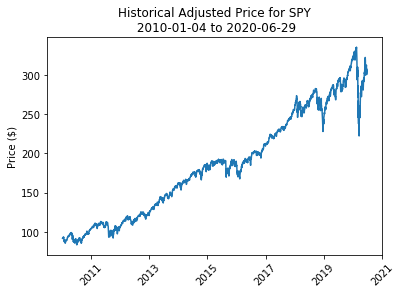

In [16]:
#df_prc = download_price('SPY', '2010-01-01', '2019-12-31')
df_prc = read_price('SPY', '2010-01-01', '2020-06-30')
line_plot(df_prc, 'SPY')

In [17]:
df_prc = add_bbvalue(df_prc.loc[:,['Date', 'SPY']], 'SPY')
df_prc['bbvalue20_band'] = 0
df_prc.loc[df_prc.bbvalue20>=2.0, 'bbvalue20_band'] = 1
df_prc.loc[df_prc.bbvalue20<=-2.0, 'bbvalue20_band'] = -1

df_prc = add_so(df_prc, 'SPY')
df_prc['so20_band'] = 0
df_prc.loc[df_prc.so20>=0.7, 'so20_band'] = 1
df_prc.loc[df_prc.so20<=0.3, 'so20_band'] = -1

df_prc = add_rsi(df_prc, 'SPY')
df_prc['rsi14_band'] = 0
df_prc.loc[df_prc.rsi14>=0.7, 'rsi14_band'] = 1
df_prc.loc[df_prc.rsi14<=0.3, 'rsi14_band'] = -1

df_prc = add_rtrn(df_prc, 'SPY', 'f', 1)
df_prc.rename(columns={'rtrn_f_1d': 'rtrn'}, inplace=True)

In [18]:
df_train = df_prc.iloc[2016:2516, :].copy()
clf = QLearner(gamma=0.9995, penalty=0.002)
clf.initialize_Q(df_train, ['bbvalue20_band', 'so20_band', 'rsi14_band'])
clf.df_Q

,Q_long,Q_flat,Q_short,Q_max,pstn,pstn_prev
state_code,,,,,,
"-1, -1, -1, -1",0.000068,0.000114,-0.000031,0.000114,0,0
"-1, -1, -1, 0",0.000025,0.000068,-0.000018,0.000068,0,0
"-1, -1, -1, 1",0.000027,-0.000011,0.000021,0.000027,1,0
"-1, -1, 0, -1",-0.000115,0.000046,-0.000003,0.000046,0,0
"-1, -1, 0, 0",0.000134,0.000018,0.000034,0.000134,1,0
"-1, -1, 0, 1",0.000115,-0.000038,-0.000010,0.000115,1,0
"0, -1, -1, -1",0.000047,-0.000069,-0.000063,0.000047,1,0
"0, -1, -1, 0",0.000040,-0.000079,0.000021,0.000040,1,0
"0, -1, -1, 1",0.000061,0.000235,-0.000121,0.000235,0,0


In [9]:
df_t = clf.codify_state(df_train, ['bbvalue20_band', 'so20_band', 'rsi14_band'])
df_t['state_code_next'] = df_t.state_code.shift(-1)
df_updt = df_t[:-1]

In [15]:
#df_updt = df_updt.sample(frac=1).reset_index(drop=True)
clf.update_Q_table(df_updt)
clf.df_Q

,Q_long,Q_flat,Q_short,Q_max,pstn,pstn_prev
state_code,,,,,,
"-1, -1, -1, -1",0.056218,0.050297,0.044281,0.056218,1,0
"-1, -1, -1, 0",0.058209,0.052295,0.043640,0.058209,1,0
"-1, -1, -1, 1",0.058212,0.049562,0.041649,0.058212,1,0
"-1, -1, 0, -1",0.044126,0.045148,0.046259,0.046259,-1,0
"-1, -1, 0, 0",0.046120,0.047244,0.045852,0.047244,0,0
"-1, -1, 0, 1",0.046222,0.044539,0.043858,0.046222,1,0
"0, -1, -1, -1",0.021275,0.016063,0.010630,0.021275,1,0
"0, -1, -1, 0",0.021882,0.016636,0.010635,0.021882,1,0
"0, -1, -1, 1",0.021941,0.015960,0.009955,0.021941,1,0


In [11]:
clf.predict(df_train).head(5)

,Date,SPY,bbvalue20,bbvalue20_band,so20,so20_band,rsi14,rsi14_band,rtrn,state_code,state_code_next,pstn
0,2018-01-05,260.650299,2.438476,1,1.000000,1,0.795699,1,0.001829,"1, 1, 1","1, 1, 1",-1
1,2018-01-08,261.126984,2.252405,1,1.000000,1,0.803364,1,0.002263,"1, 1, 1","1, 1, 1",-1
2,2018-01-09,261.718018,2.096657,1,1.000000,1,0.812730,1,-0.001530,"1, 1, 1","0, 1, 1",-1
3,2018-01-10,261.317596,1.710108,0,0.958944,1,0.785496,1,0.007296,"0, 1, 1","0, 1, 1",1
4,2018-01-11,263.224152,1.987992,0,1.000000,1,0.816989,1,0.006519,"0, 1, 1","1, 1, 1",1


In [12]:
pl_buyhold, pl_trade = calc_bt_pl(clf.predict(df_train))
print('Buy and hold returns ${} for $1 investment.'.format(pl_buyhold))
print('Q-Learning based trading returns ${} for $1 investment.'.format(pl_trade))

Buy and hold returns $1.2222 for $1 investment.
Q-Learning based trading returns $0.8638 for $1 investment.


In [13]:
df_score = df_prc.iloc[2516:-1, :].copy()
df_score.head(5)

,Date,SPY,bbvalue20,bbvalue20_band,so20,so20_band,rsi14,rsi14_band,rtrn
2516,2020-01-02,321.555786,1.589831,0,1.000000,1,0.766122,1,-0.007572
2517,2020-01-03,319.120911,0.968967,0,0.828890,1,0.663958,0,0.003815
2518,2020-01-06,320.338379,1.170162,0,0.904461,1,0.686632,0,-0.002812
2519,2020-01-07,319.437653,0.858519,0,0.833775,1,0.651729,0,0.005330
2520,2020-01-08,321.140106,1.209656,0,0.967379,1,0.684469,0,0.006781


In [14]:
pl_buyhold, pl_trade = calc_bt_pl(clf.predict(df_score))
print('Buy and hold returns ${} for $1 investment.'.format(pl_buyhold))
print('Q-Learning based trading returns ${} for $1 investment.'.format(pl_trade))

Buy and hold returns $0.9331 for $1 investment.
Q-Learning based trading returns $1.1794 for $1 investment.
